# #  AIML -SUPERVISED LEARNING MODULE PROJECT

# PART-A:30 MARKS

# DOMAIN: 
Medical

# CONTEXT:
Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.
# DATA DESCRIPTION: 
The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
# PROJECT OBJECTIVE: 
To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

#  Import the Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection





In [2]:
# Load the dataset into a Pandas dataframe called df1
df1=pd.read_csv('Part1_Normal.csv')
df1.shape


(100, 7)

we are having 100 rows, 7 columns in normal dataset

In [3]:
df1.head(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
5,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,Normal
6,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,Normal
7,38.126589,6.557617,50.445075,31.568971,132.114805,6.338199,Normal
8,51.624672,15.969344,35.000000,35.655328,129.385308,1.009228,Nrmal
9,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,Nrmal


# Data Understanding

In [4]:
df2=pd.read_csv('Part1_Type_H.csv')
df2.shape

(60, 7)

we are having 60 rows and 7 columns in Type H dataset

In [5]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [6]:
df3=pd.read_csv('Part1_Type_S.csv')
df3.shape

(150, 7)

we are having 150 rows and 7 columns in type S dataset

In [7]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In all 3 dataset , the columns were same. So, we can append all three dataframe into single dataframe i.e appending df2 & df3 in df1

In [8]:
pdata=df1.append([df2,df3],ignore_index=True)
#pd.concat((pd.read_csv(file) for file in stock_files), ignore_index=True


In [9]:
pdata.shape

(310, 7)

Hence we have appended all together and forms a dataframe having 310 rows and 7 columns

In [10]:
pdata.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [11]:
pdata.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Only "class" variable is object and remaining all the columns were in float. Also, there were no junk available in this dataframe

In [12]:
pdata.isnull().sum()  #checking for missing values

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

There is no missing (null) value in this dataset

In [13]:
pdata['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

Here, (Normal&Nrmal), (type_h&Type_H), (type_S & tp_s) are of same class. These variation can be combined together

# Data Preparation and Exploration

In [15]:
pdata['Class'].replace("tp_s", "Type_S", inplace=True)
pdata['Class'].replace("Nrmal", "Normal", inplace=True)
pdata['Class'].replace("type_h", "Type_H", inplace=True)
pdata['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

 All the class were combined as per their type. So, totally Type_S has 150 ; Type_H has 60, Normal class has 100

In [16]:
pdata['Class']=pdata['Class'].astype('category') #changing to category datatype
pdata['Class'].nunique()

3

Here we have three unique classes in our dataset and 'class' variable has been converted to Categorical variable

### 5 point summary

In [19]:
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


# P_incidence:

Mean and Median are nearly equal .

Distribution might be normal. we have 75 % of values are less than 72 but maxiumum value is 129

# P_tilt:

Mean and median are nearly equal.

Distribution might be normal.

It contains negative values

75 % of values are less than 22 but maximum value is 49 so there might be little right skewness

# L_angle:

Mean and Median are nearly equal. There is no deviation.

Distribution might be normal

There might be few outliers because of the maximum value

# S_slope:

Mean and Median are nearly equal.

Towards the end there is little devation. 75% of values are lesser than 52 but maximum value is 121.

# P_radius:

Distribution might be normal.

There is no much Deviation.

# S_Degree:

Mean is greater than Median so there might be right skewness in the data .

We can see 75% of values are less than 41 but maximum value is 418 so there is obvious outliers in the data.

In [20]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


# Data Analysis and visualisation

In [63]:
pdata.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


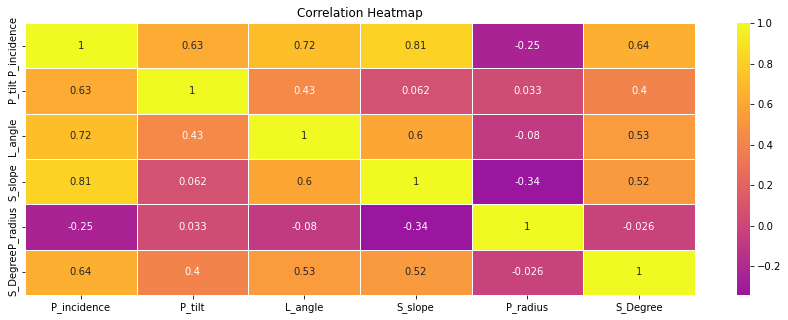

In [64]:
# To get a correlation matrix 
# Ploting correlation plot
corr = pdata.corr() 
plt.figure(figsize=(15, 5))
# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
sns.heatmap(corr,center = 0,annot= True,linewidth=0.5,cmap= 'plasma')
plt.title('Correlation Heatmap')    # specify name of the plot
plt.show()






1. yellow colour is max correlated but we are not having 100% correlated feature.
2. P_incidence has strong correlation with S_slope with correlation value as "0.81"
3. P_incidence has weaker correlation with P_radius as c_value: "-0.25"
3. P_incidence has medium correlation with P_tilt , L_angle & S_degree 
4. Negative correlation exist between (S_slope & P_radius), (P_incidence & P_radius) , (P_incidence & P_radius)
5. Most of the variables are highly correlated

# A. Features having stronger correlation with correlation value

    P_incidence & S_Slope have high correlated with Corr Value: 0.81


# B. Features having weaker correlation with correlation value.

    P_Radius and S_Slope are weakly correlated with value: -0.34
    
# Multivariant Analysis

In [21]:
pdata.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

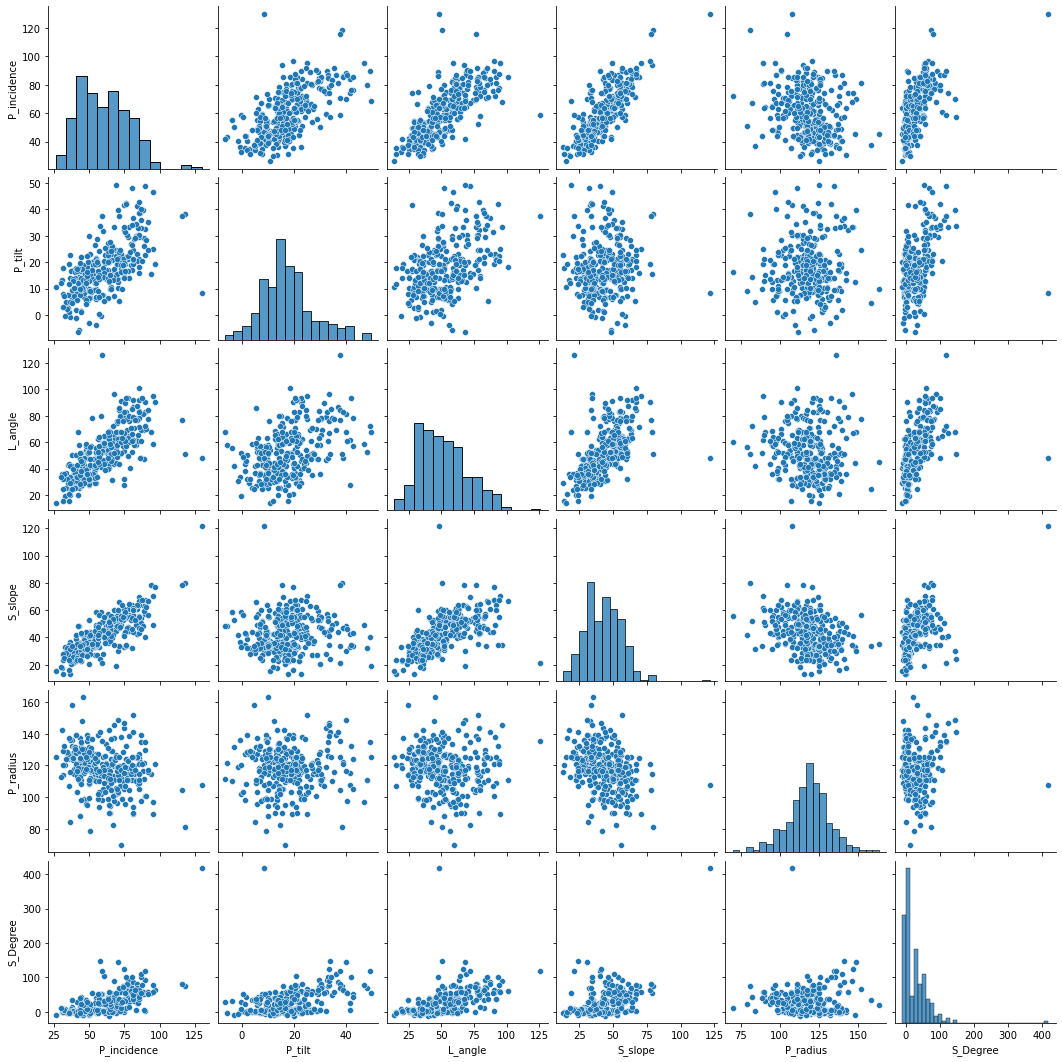

In [22]:
sns.pairplot(pdata)

Along the diagonal we can see the distribution of individual variable

P_incidence has postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle

P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with s_slope and p_radius

L_angle has postive Relationship with p_tilt,s_slope and s_degree. It has no Relationship with P_radius

s_slope has positive Relationship with L_angle and s_degree

p_radius has no Relationship with s_degree,p_tilt,l_angle.

S_degree has no strong positive Relationship with any of the variables.

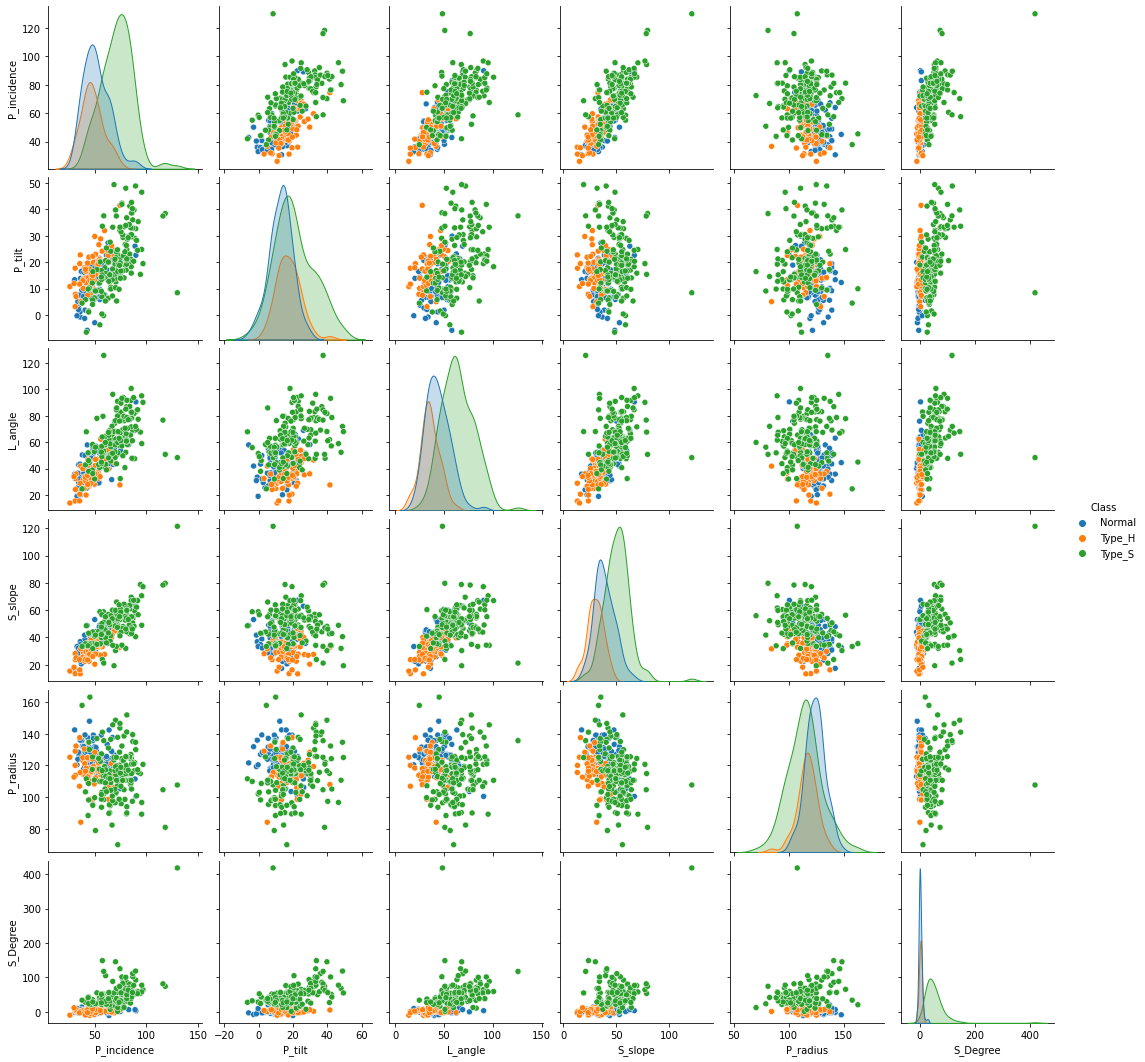

In [23]:
sns.pairplot(pdata,hue= "Class")

* variable distribution for three claases are differing along the diagonal

* It is evident that type_s class is dominant over other two classes 

* Type_H is less compared to Normal class 

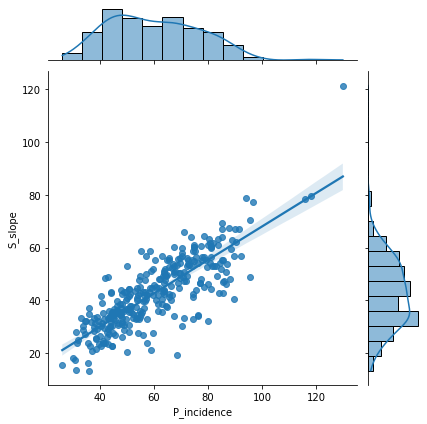

In [24]:
sns.jointplot(x='P_incidence',y='S_slope',data=pdata ,kind='reg')

* P_incidence and S_slope were normally distributed with slight skew at the right
* one outlier is present leads to right skewed distribution
* Most of the data are away from regression line

## Distribution and outlier analysis of numerical variables

### 1. P_incidence

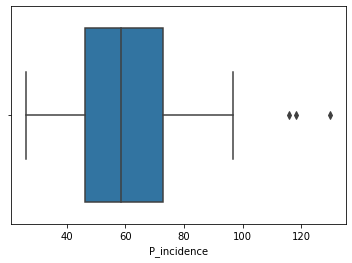

 Total Number of outliers in P_incidence: 3


In [25]:
sns.boxplot(x = 'P_incidence', data=pdata,)
plt.show()
#checking count of outliers.
q25,q75=np.percentile(pdata['P_incidence'],25),np.percentile(pdata['P_incidence'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in pdata['P_incidence'] if i < lower or i > upper]
print('{} Total Number of outliers in P_incidence: {}'.format('\033[1m',len(Outliers)))

* Normally distributed with less extreme values

### 2.P_tilt

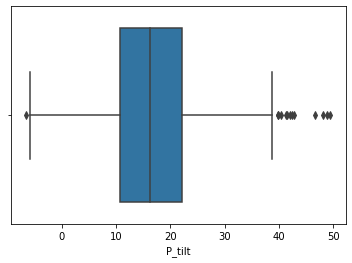

 Total Number of outliers in P_tilt: 13


In [26]:
sns.boxplot(x = 'P_tilt', data=pdata,)
plt.show()
#checking count of outliers.
q25,q75=np.percentile(pdata['P_tilt'],25),np.percentile(pdata['P_tilt'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in pdata['P_tilt'] if i < lower or i > upper]
print('{} Total Number of outliers in P_tilt: {}'.format('\033[1m',len(Outliers)))

* We can see 1 outlier in negative side, few on the positive side

### 3.L_angle

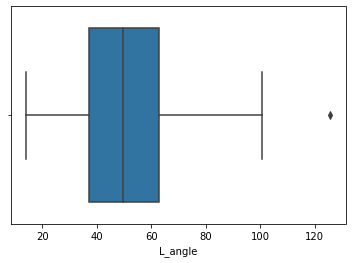

 Total Number of outliers in L_angle: 1


In [27]:
sns.boxplot(x = 'L_angle', data=pdata,)
plt.show()
#checking count of outliers.
q25,q75=np.percentile(pdata['L_angle'],25),np.percentile(pdata['L_angle'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in pdata['L_angle'] if i < lower or i > upper]
print('{} Total Number of outliers in L_angle: {}'.format('\033[1m',len(Outliers)))

* distribution is slightly right skewed due to 1 outlier on positive end

### 4. S_slope

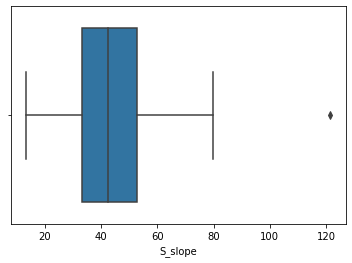

 Total Number of outliers in S_slope: 1


In [28]:
sns.boxplot(x = 'S_slope', data=pdata,)
plt.show()
#checking count of outliers.
q25,q75=np.percentile(pdata['S_slope'],25),np.percentile(pdata['S_slope'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in pdata['S_slope'] if i < lower or i > upper]
print('{} Total Number of outliers in S_slope: {}'.format('\033[1m',len(Outliers)))

* * distribution is slightly right skewed due to 1 outlier on positive end

### 5.P_radius

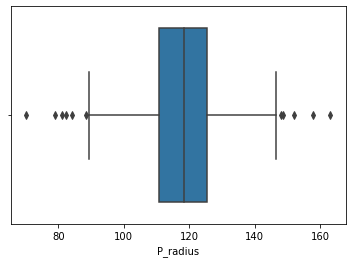

 Total Number of outliers in P_radius: 11


In [29]:
sns.boxplot(x = 'P_radius', data=pdata,)
plt.show()
#checking count of outliers.
q25,q75=np.percentile(pdata['P_radius'],25),np.percentile(pdata['P_radius'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in pdata['P_radius'] if i < lower or i > upper]
print('{} Total Number of outliers in P_radius: {}'.format('\033[1m',len(Outliers)))

* we can see outliers on both the ends

### 6. S_Degree

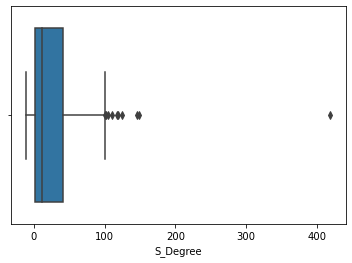

 Total Number of outliers in S_Degree: 10


In [30]:
sns.boxplot(x = 'S_Degree', data=pdata,)
plt.show()
#checking count of outliers.
q25,q75=np.percentile(pdata['S_Degree'],25),np.percentile(pdata['S_Degree'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in pdata['S_Degree'] if i < lower or i > upper]
print('{} Total Number of outliers in S_Degree: {}'.format('\033[1m',len(Outliers)))

* distribution is right skewed with more no. of outliers on the positive end

### We are imputing outiers with mean

In [31]:
#col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for c in pdata.columns:
    #getting upper lower quartile values
    q25,q75=np.percentile(pdata[c],25),np.percentile(pdata[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in pdata[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    pdata_include = pdata.loc[(pdata[c] >= lower) & (pdata[c] <= upper)]
    mean=int(pdata_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    pdata[c]=np.where(pdata[c]>upper,mean,pdata[c])
    pdata[c]=np.where(pdata[c]<lower,mean,pdata[c])
    Outliers=[i for i in pdata[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in P_incidence Before Imputing : 3


 Mean of P_incidence is 59


 Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 13


 Mean of P_tilt is 16


 Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 1


 Mean of L_angle is 51


 Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 1


 Mean of S_slope is 42


 Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 11


 Mean of P_radius is 118


 Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 10


 Mean of S_Degree is 22


 Total Number of outliers in S_Degree After Imputing : 0




UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U6'), dtype('<U6')) -> dtype('<U6')

* We have imputed all outliers with mean value

### Determination of target variable

C:\Users\udhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


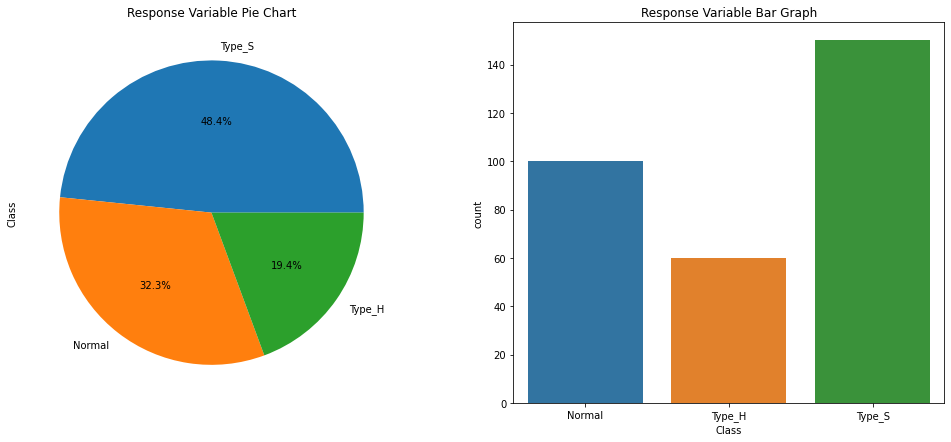

In [33]:
f,axes=plt.subplots(1,2,figsize=(17,7))
pdata['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=pdata,ax=axes[1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

 Distribution of normal class: 32.3%
 Distribution of Type_H class: 19.4%
 Distribution of Type_S class: 48.4%
 Count of Type_S is comparitively high than other classes

In [34]:
le=LabelEncoder()
pdata['Class']=le.fit_transform(pdata['Class'])
pdata['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

Normal: 0

Type_H :1

Type_S :2

## hypothesis Testing

In [74]:
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for i in col:
    print('{} Ho: Class types does not affect the {}'.format('\033[1m',i))
    print('\n')
    print('{} H1: Class types affect the {}'.format('\033[1m',i))
    print('\n')
    df_normal=pdata[pdata.Class=='Normal'][i]
    df_typeH=pdata[pdata.Class=='Type_H'][i]
    df_typeS=pdata[pdata.Class=='Type_S'][i]
    f_stats,p_value=stats.f_oneway(df_normal,df_typeH,df_typeS)
    print('{} F_stats: {}'.format('\033[1m',f_stats))
    print('{} p_value: {}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.Class types has effect on {}'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.Class types has no effect on {}'.format('\033[1m',i))
    print('\n')

 Ho: Class types does not affect the P_incidence


 H1: Class types affect the P_incidence


 F_stats: nan
 p_value: nan
 Fail to Reject Null Hypothesis.Class types has no effect on P_incidence


 Ho: Class types does not affect the P_tilt


 H1: Class types affect the P_tilt


 F_stats: nan
 p_value: nan
 Fail to Reject Null Hypothesis.Class types has no effect on P_tilt


 Ho: Class types does not affect the L_angle


 H1: Class types affect the L_angle


 F_stats: nan
 p_value: nan
 Fail to Reject Null Hypothesis.Class types has no effect on L_angle


 Ho: Class types does not affect the S_slope


 H1: Class types affect the S_slope


 F_stats: nan
 p_value: nan
 Fail to Reject Null Hypothesis.Class types has no effect on S_slope


 Ho: Class types does not affect the P_radius


 H1: Class types affect the P_radius


 F_stats: nan
 p_value: nan
 Fail to Reject Null Hypothesis.Class types has no effect on P_radius


 Ho: Class types does not affect the S_Degree


 H1: Class types aff

C:\Users\udhay\anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


## model building

### Split data into X and Y.

In [75]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Class',axis=1)     # Predictor feature columns (8 X m)

Y = pdata['Class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# Train:Test ratio : 80:20

x_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
132,44.936675,17.443838,27.780576,27.492837,117.980324,5.569620
208,63.172987,6.330911,63.000000,56.842076,110.644021,42.608076
62,39.358705,7.011262,37.000000,32.347443,117.818760,1.904048


In [76]:
#Lets check split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [77]:
#Check hidden missing values
x_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
132,44.936675,17.443838,27.780576,27.492837,117.980324,5.569620
208,63.172987,6.330911,63.000000,56.842076,110.644021,42.608076
62,39.358705,7.011262,37.000000,32.347443,117.818760,1.904048


In [78]:
from scipy.stats import zscore
X_Scaled=X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,-6.159947e-17,1.001617,-2.094203,-0.835517,-0.074638,0.770733,2.281479
P_tilt,310.0,5.241663e-17,1.001617,-2.669021,-0.696391,-0.065374,0.533059,2.646095
L_angle,310.0,1.876635e-16,1.001617,-2.089008,-0.814203,-0.117915,0.624929,2.718904
S_slope,310.0,-2.438909e-16,1.001617,-2.321190,-0.739985,-0.027582,0.773799,2.927936
P_radius,310.0,-8.022257e-16,1.001617,-2.539211,-0.597449,-0.005408,0.630066,2.508397
S_Degree,310.0,-1.130816e-16,1.001617,-1.320025,-0.817373,-0.413874,0.633223,3.100356


* Indepedent variables are scaled to ZSCORE
* On scaling, the values of mean and standard deviation are approx to 0 & 1

In [79]:

print(x_train.shape)
print(x_test.shape)

(248, 6)
(62, 6)


### Build kNN Model

In [80]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(x_train, y_train) # fitting the model
y_pred = knn.predict(x_test) # predict the response
# evaluate accuracy
print('Accuracy on Training data:',knn.score(x_train, y_train) )
print('Accuracy on Test data:',knn.score(x_test, y_test) ) 



Accuracy on Training data: 0.9112903225806451
Accuracy on Test data: 0.8548387096774194


Training Acuracy is 0.91 and Testing Accuracy is 0.85. Performance is less in test data.

This is due to overfitting of data

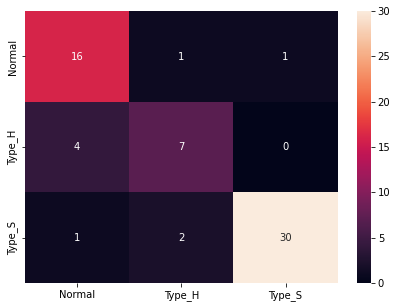

In [81]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

On average,Misclassification of labels occur on all classes. 
Type_S is mostly predicted correctly when compared to others

In [82]:
print("classification  Matrix:\n",classification_report(y_test,y_pred))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.70      0.64      0.67        11
           2       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.81      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62




class 0 predicted correctly for 76% of time. similary for class 1 70% and class 2 97%

By F1 score we can say that precison and recall is harmonically balanced for class 0 by 82% , class1 by 67% and class 2 by 94%

We have maximum F1 score for class 2 (Type_S)



In [83]:
# instantiate learning model (k = 5)
#knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
#knn.fit(x_train, y_train)
#y_pred = knn.predict(x_test)
#print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
#knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
#knn.fit(x_train, y_train)
#y_pred = knn.predict(x_test)
#print(accuracy_score(y_test, y_pred))

In [84]:
# creating odd list of K for KNN
#myList = list(range(1,20))

# subsetting just the odd ones
#neighbors = list(filter(lambda x: x % 2 != 0, myList))



## Finding Best K value

In [87]:
train_score=[]
test_score=[]
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

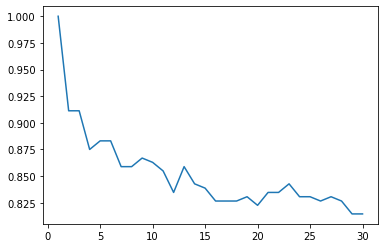

In [88]:
plt.plot(range(1,31),train_score)
plt.show()

Accuracy decreases for increase in k value for train set

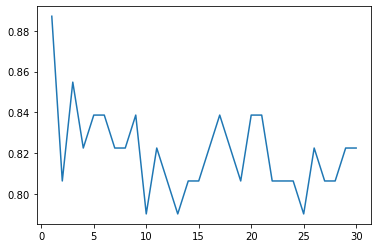

In [91]:
plt.plot(range(1,31),test_score)
plt.show()

The maximum accuracy occures when k is less than 2

We will fix k value as less than 2

In [92]:
k=[1,2]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(x_train, y_train)
    predicted_labels = KNN.predict(x_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(x_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(x_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8870967741935484:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.80      0.73      0.76        11
           2       0.97      0.91      0.94        33

    accuracy                           0.89        62
   macro avg       0.86      0.86      0.86        62
weighted avg       0.89      0.89      0.89        62

Accuracy on Training data for k 2 is 0.9112903225806451:
Accuracy on Test data for k 2 is 0.8064516129032258:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77        18
           1       0.71      0.45      0.56        11
           2       0.97      0.85      0.90        33

    accuracy                           0.81        62
   macro avg       0.78      0.75      0.74        62
weighted avg       0.83      0.81     

Accuracy is maximum for k=1 (100%)
Precision for Normal class: It tells,out of all predicted normal class :81% are predicted correctly
similary for Type_S 97% and Type_H 80%

By F1 score we can say that precison and recall is balanced for Type_S class by 94% 

We have maximum F1 score for Type_S (94%)

We have achieved accuracy of 89% from this model


Here training accuracy decreases when increase k value

The maximum accuracy occures when k is greater than 0.

We will fix k value as 1

## K-Fold CV for finding best model

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=1)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

C:\Users\udhay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\udhay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.816129 (0.079082)
KNN: 0.829032 (0.032419)
NB: 0.816129 (0.038304)
SVM-linear: 0.841935 (0.068354)
SVM-poly: 0.822581 (0.069561)
SVM-rbf: 0.483871 (0.070674)


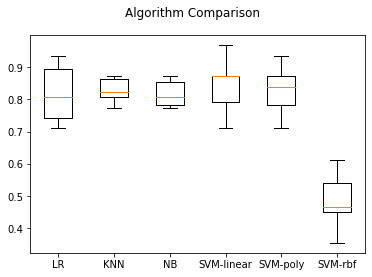

In [97]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  X,Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.816129 (0.079082)

KNN: 0.829032 (0.032419)

NB: 0.816129 (0.038304)

SVM-linear: 0.841935 (0.068354)

SVM-poly: 0.822581 (0.069561)

SVM-rbf: 0.483871 (0.070674)


Average Accuracy is more for KNN,LR and svm-linear, SVM-poly. 
mean Accuracy is very low for SVM_rbf model (~ 48%)
We can tell svm-linear be a better algorithm for this dataset because of high accuracy and less Standard deviation

## Conclusion and improvisation:

* All the variables has significant effect on target class

* class belongs to type_S has higher mean value for alomst all variables

* Class belongs to Type_H has lower values for all variables

* For almost all variables the distribution is normal

* For Knn, k=1 we are getting balanced train and test error


We can use KNN as a final model because of balanced train and test error also the recall and precision values are good

Clear description on each variables may help to understand problem statement better because of medical domain

# PART: B

## DOMAIN: 
Banking, Marketing

### CONTEXT: 
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

### PROJECT OBJECTIVE: 
Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.

### Data Understanding and Preparation

READ AND LOAD DATA

In [98]:
df1 = pd.read_csv("Part2_Data1.csv")

In [99]:
df2 = pd.read_csv("Part2_Data2.csv")

In [100]:
df1.shape


(5000, 8)

df1 has 5000 rows and 8 columns

In [101]:
df2.shape

(5000, 7)

df2 has 5000 rows and 7 columns

In [102]:
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [103]:
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


## Merging dataset

In [104]:
df=df1.merge(df2,left_on='ID',right_on='ID') #id is common in both dataframe


In [105]:
df.columns     

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [106]:
df.shape

(5000, 14)

dataframe is finally having 5000 rows and 14 columns on combined both dataframes

In [107]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


## Data Cleansing

In [108]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

All the variables were either int or float type. Categorical variables are need to change its datatype

In [109]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    df[i]=df[i].astype("category")

In [110]:
df.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

categorical variables were changes to category data type

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


Target variable is missing with some values

In [155]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

LoanOnCard is having 20 null values. Since thes are target variable and wont create any effect on model,drop these values 

In [112]:
df.dropna(axis=0,inplace=True)

In [113]:
df.drop('ID',axis=1,inplace = True)  #Id column is not useful in model building so dropping that feature

## 3.Data Analysis & Visualization

* 5 point summary

In [114]:
df.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


Mean and Median of Age,customer since column is nearly equal,So there wont be any skewness

Mean is greater than Median in highestspend and monthly average spend.So Positive skewness will exist

We can see high fluctuation in mortage column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers

## Univariate Analysis
### Distribution and outlier analysis of numerical variables

#### Age

C:\Users\udhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


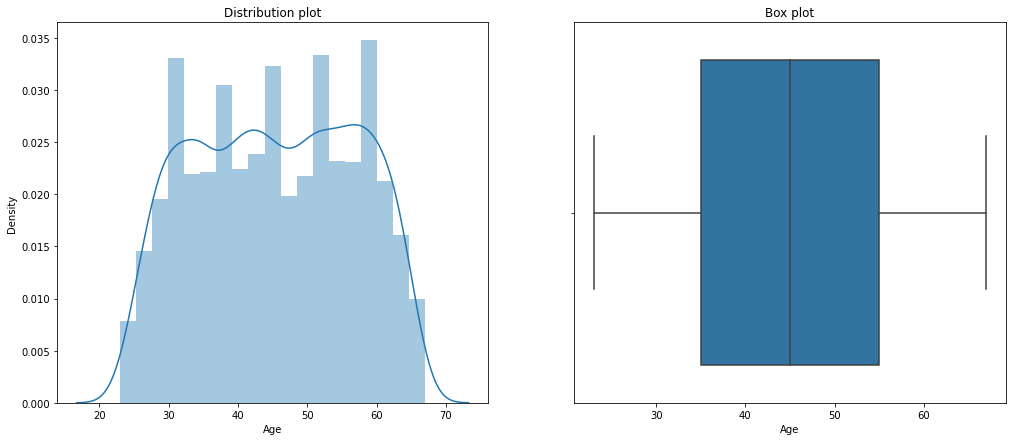

 Total Number of outliers in Age: 0


In [115]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Age', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Age'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Age'],25),np.percentile(df['Age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Age'] if i < lower or i > upper]
print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))

There is normality maintained in age column. 

People with age between 35 to 65 are more AS center part is little wider

We have no outliers in this column

### Customer Since

C:\Users\udhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


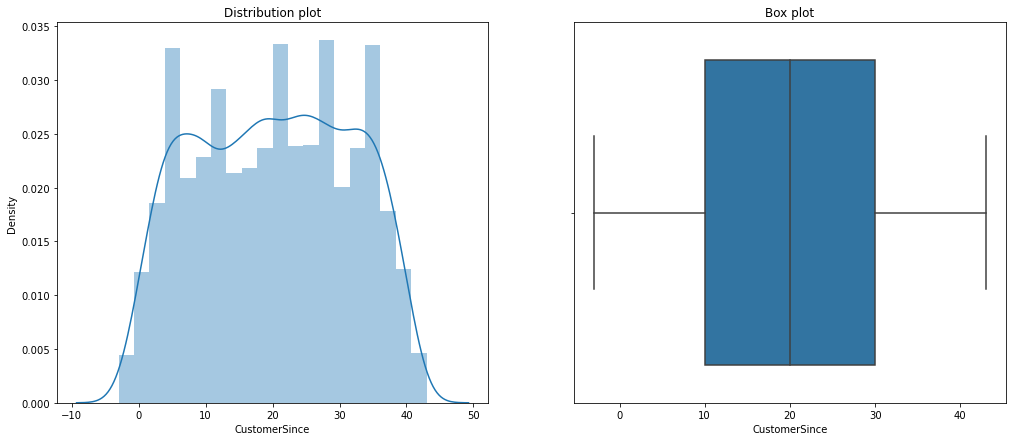

 Total Number of outliers in CustomerSince: 0


In [116]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['CustomerSince'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['CustomerSince'],25),np.percentile(df['CustomerSince'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['CustomerSince'] if i < lower or i > upper]
print('{} Total Number of outliers in CustomerSince: {}'.format('\033[1m',len(Outliers)))

Most of the people became customer of bank between 10 to 30 and the units are masked

We have no outliers

C:\Users\udhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


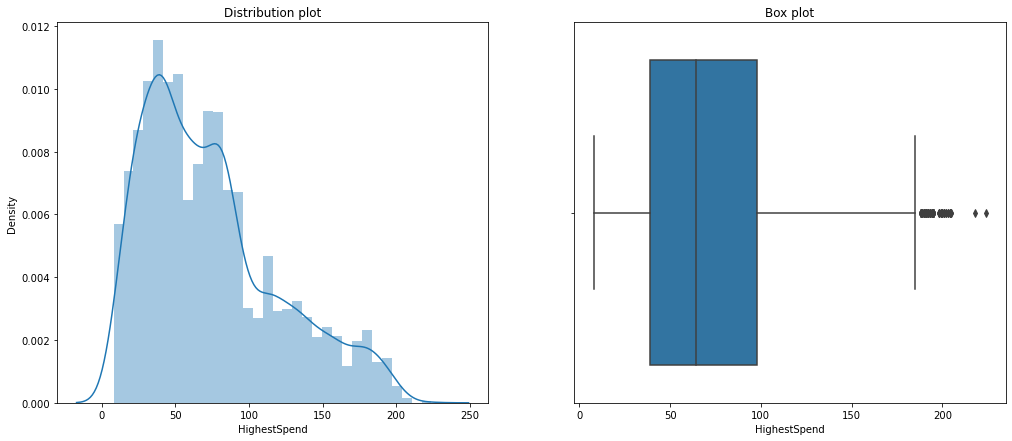

 Total Number of outliers in HighestSpend: 96


In [117]:
#HighestSpend
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'HighestSpend', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['HighestSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['HighestSpend'],25),np.percentile(df['HighestSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['HighestSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in HighestSpend: {}'.format('\033[1m',len(Outliers)))

positive skewness occurs in the data

In one transaction highest spend amount is between 45 to 100. Here the units are masked

We can see 96 Outliers. Few customers spent more than 200 as wel

C:\Users\udhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


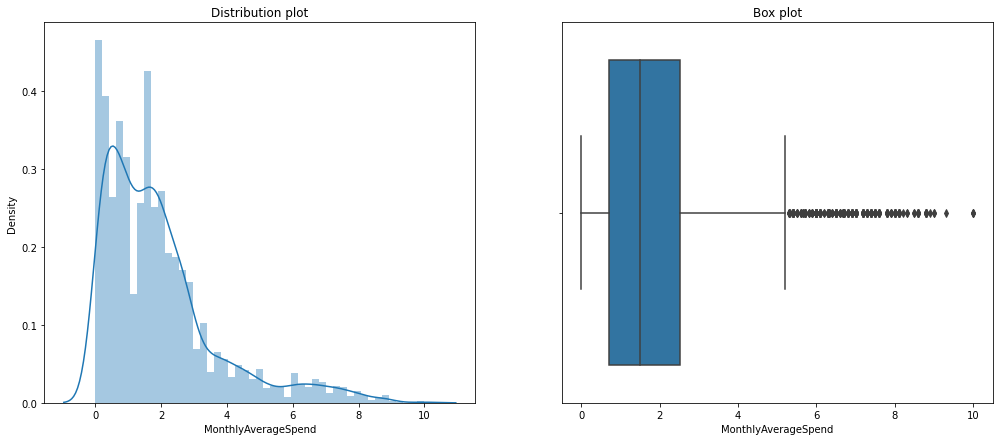

 Total Number of outliers in MonthlyAverageSpend: 324


In [118]:
#MonthlyAverageSpend
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MonthlyAverageSpend', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['MonthlyAverageSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['MonthlyAverageSpend'],25),np.percentile(df['MonthlyAverageSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['MonthlyAverageSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in MonthlyAverageSpend: {}'.format('\033[1m',len(Outliers)))

Right skewness occured
Monthly average spend of the customer are mostly between 1 to 3(Units are masked)

There is more number of outliers.This tells some customers spent huge amount as well

C:\Users\udhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


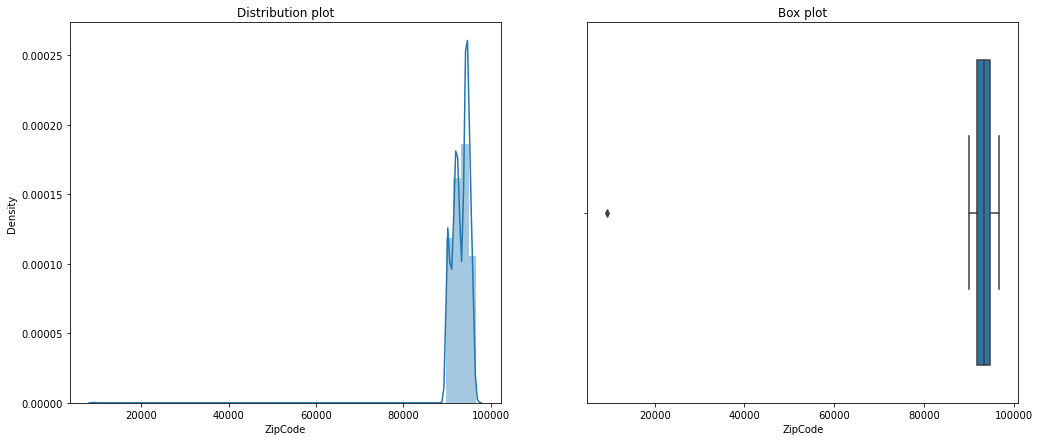

 Total Number of outliers in ZipCode: 1


In [119]:
#ZipCode
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'ZipCode', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['ZipCode'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['ZipCode'],25),np.percentile(df['ZipCode'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['ZipCode'] if i < lower or i > upper]
print('{} Total Number of outliers in ZipCode: {}'.format('\033[1m',len(Outliers)))

There is no proper distribution

This column does not add value to the model. We will drop during model building

C:\Users\udhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


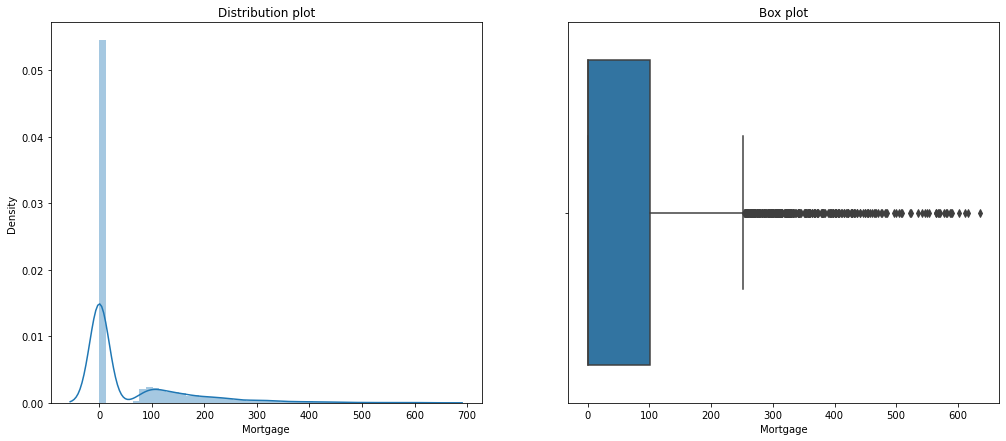

 Total Number of outliers in Mortgage: 291


In [120]:
# Mortgage
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Mortgage', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Mortgage'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Mortgage'],25),np.percentile(df['Mortgage'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Mortgage'] if i < lower or i > upper]
print('{} Total Number of outliers in Mortgage: {}'.format('\033[1m',len(Outliers)))

Most of cases we have zero as value this tell most of the cutomer doest have mortage.

we can see there is no proper distribution

### Distribution of  categorical varibles

C:\Users\udhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


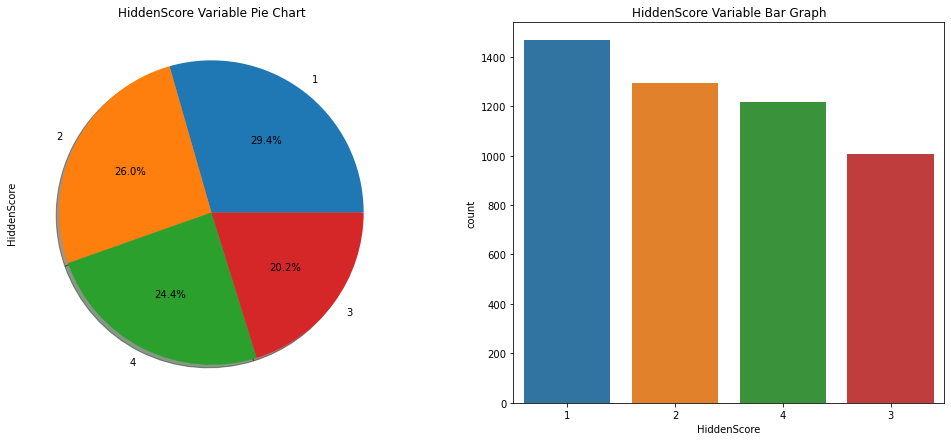

In [121]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('HiddenScore',data=df,ax=axes[1],order=[1,2,4,3])
axes[0].set_title('HiddenScore Variable Pie Chart')
axes[1].set_title('HiddenScore Variable Bar Graph')
plt.show()

Observed equal distribution

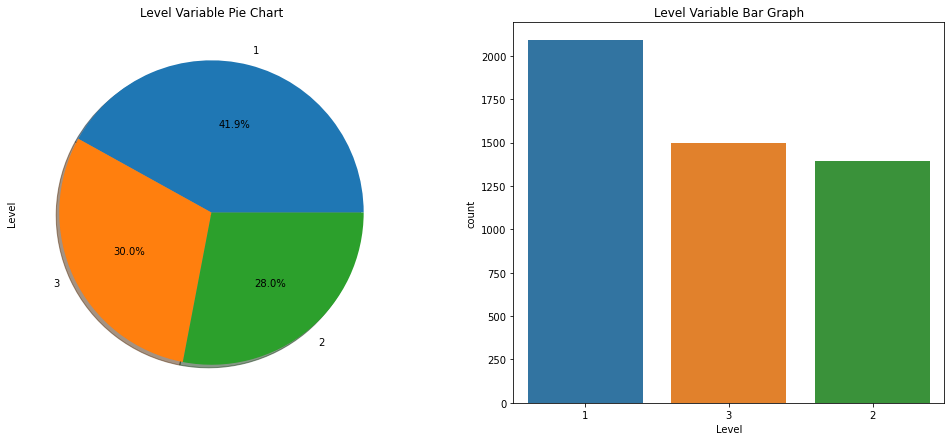

In [122]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Level'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Level',data=df,ax=axes[1],order=[1,3,2])
axes[0].set_title('Level Variable Pie Chart')
axes[1].set_title('Level Variable Bar Graph')
plt.show()

Level 2 and 3 has nearly equal distribution

Level 1 customers are more compared to others

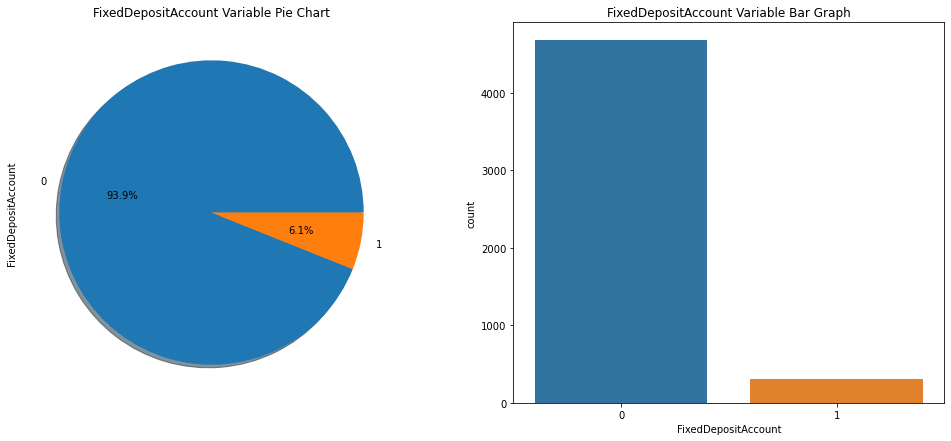

In [123]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('FixedDepositAccount',data=df,ax=axes[1])
axes[0].set_title('FixedDepositAccount Variable Pie Chart')
axes[1].set_title('FixedDepositAccount Variable Bar Graph')
plt.show()

About 93.9% of customers does not have fixed deposit account

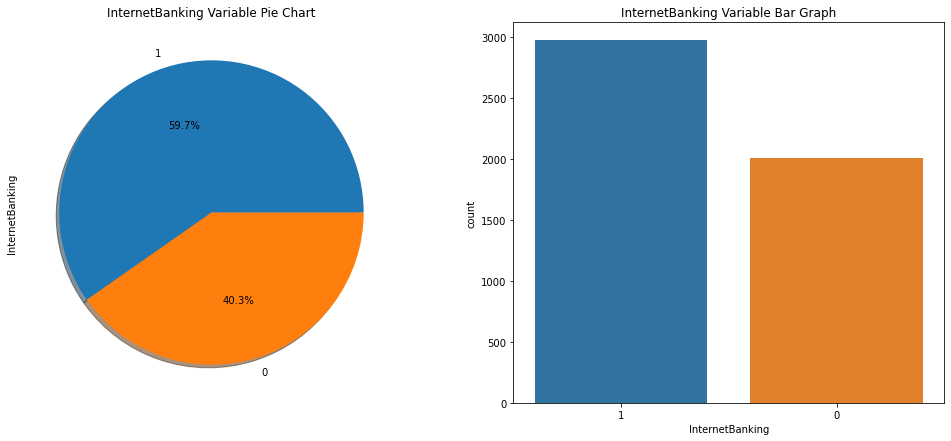

In [124]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('InternetBanking',data=df,ax=axes[1],order=[1,0])
axes[0].set_title('InternetBanking Variable Pie Chart')
axes[1].set_title('InternetBanking Variable Bar Graph')
plt.show()

Morethan 50% customers are using netbanking

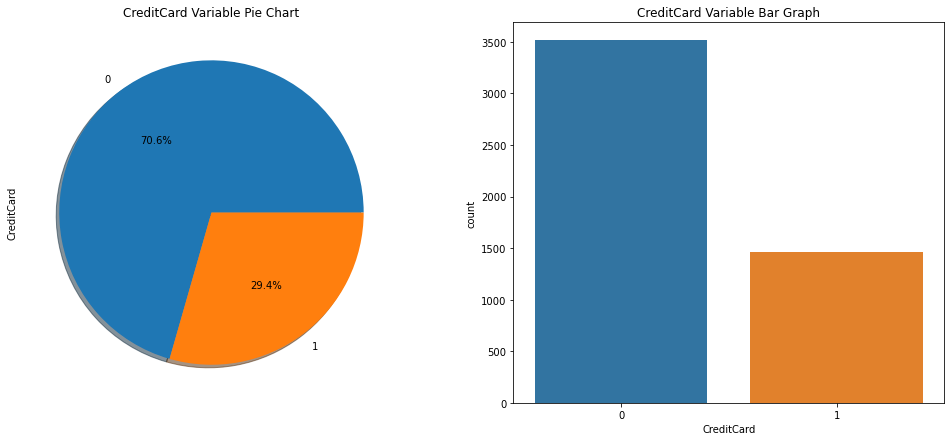

In [125]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('CreditCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('CreditCard Variable Pie Chart')
axes[1].set_title('CreditCard Variable Bar Graph')
plt.show()

About 70.6% customers are not using credit cards

C:\Users\udhay\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


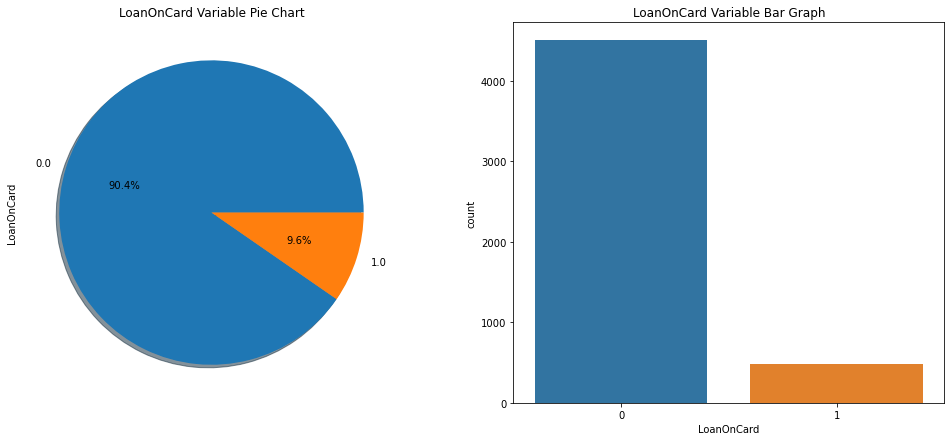

In [126]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

Almost 90.4% customers are not having loan on their credit card

There is huge imbalance in target variable.

If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model and will result in a high bias in the model. So, resampling is needed


### LoanOnCard vs CustomerSince

C:\Users\udhay\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


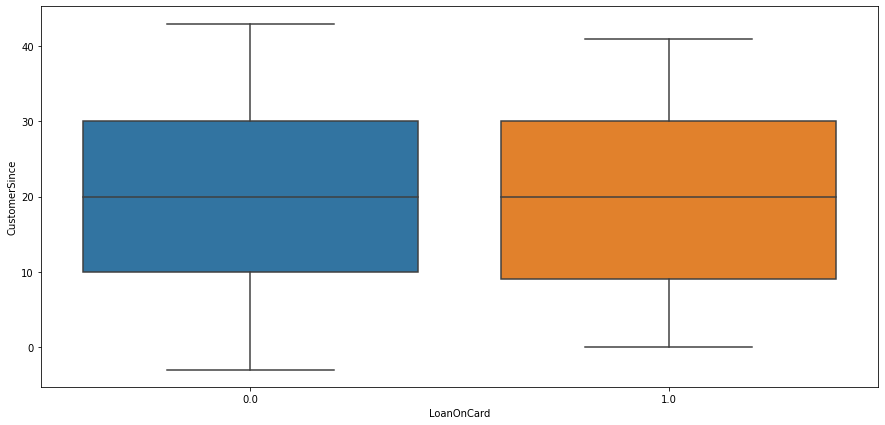

In [127]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= df)
plt.show()

Customer of the bank since has equal distribution on loan holders and non-loan holders

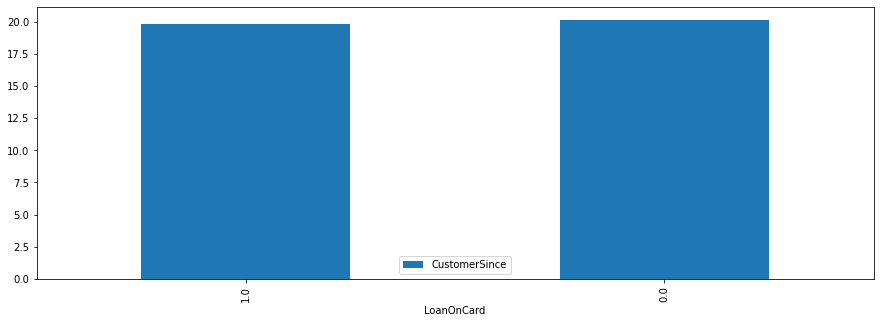

In [128]:
df.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().sort_values(['CustomerSince']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='CustomerSince',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

Mean values are nearly equal for both loan holders and non loan holders

### HighestSpend vs LoanOnCard

C:\Users\udhay\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


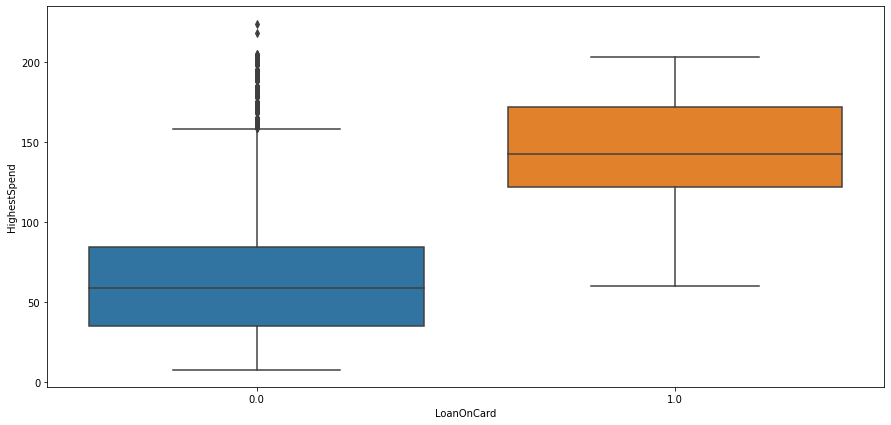

In [129]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= df)
plt.show()

It is evident that people having loan on card spends more than who doesn't have

Some customer who does not have loan also spends more sometimes.

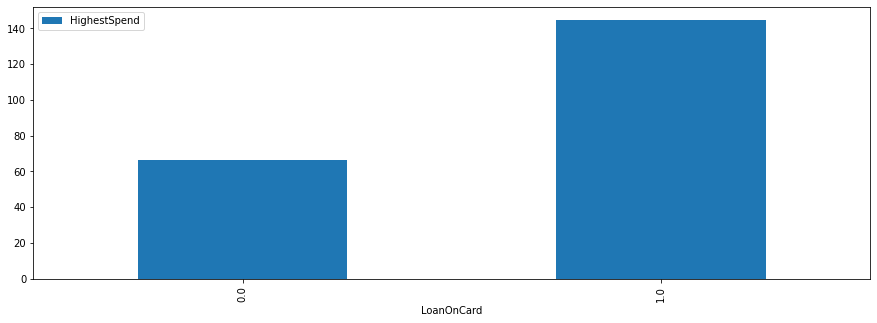

In [130]:
df.groupby(by=['LoanOnCard'])['HighestSpend'].mean().reset_index().sort_values(['HighestSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='HighestSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

Mean value of highest spend is more for loan holders

### MonthlyAverageSpend vs LoanOnCard

C:\Users\udhay\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


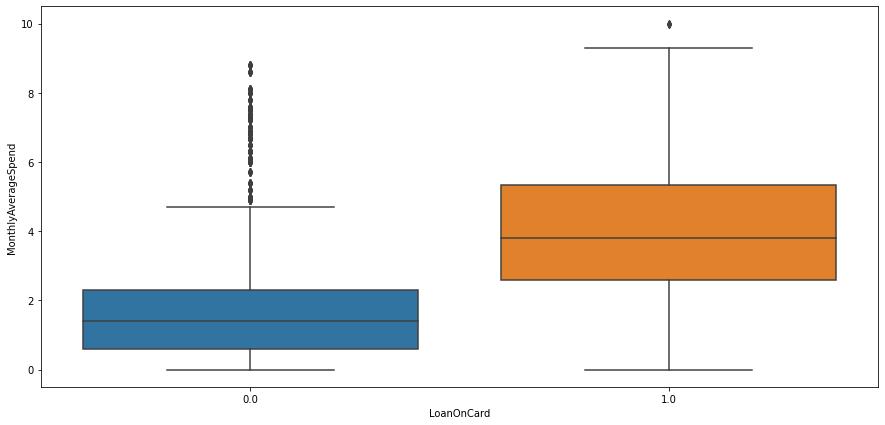

In [131]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= df)
plt.show()

Monthly average spend is more for loan holders


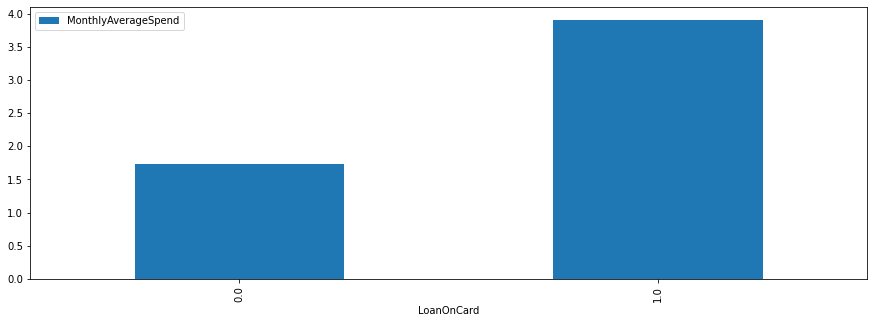

In [132]:
df.groupby(by=['LoanOnCard'])['MonthlyAverageSpend'].mean().reset_index().sort_values(['MonthlyAverageSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='MonthlyAverageSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

Average spend mean values are more for loan holders.

### Mortgage vs LoanOnCard

C:\Users\udhay\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


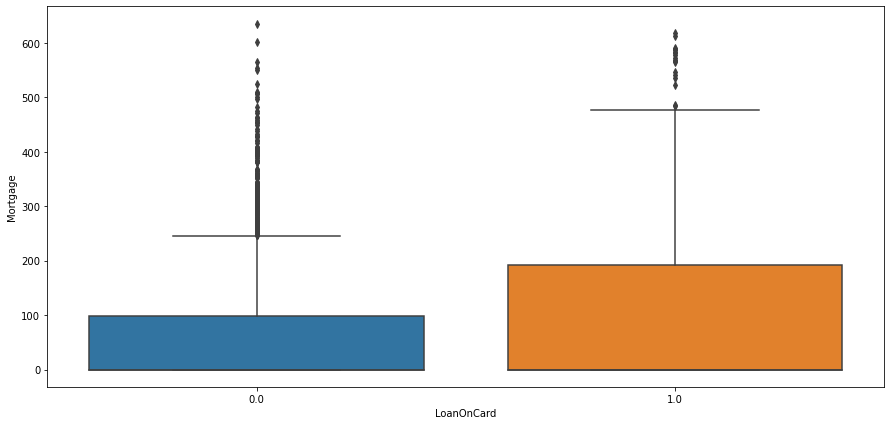

In [133]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= df)
plt.show()

Mortage value is high for loan holders

We can see extreme value in both the cases

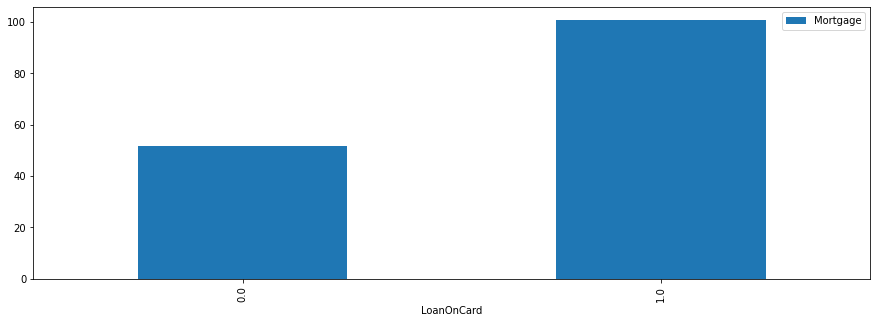

In [134]:
df.groupby(by=['LoanOnCard'])['Mortgage'].mean().reset_index().sort_values(['Mortgage']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Mortgage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

Mortgage Mean values are more for loan holders

### Loancard vs Age

C:\Users\udhay\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


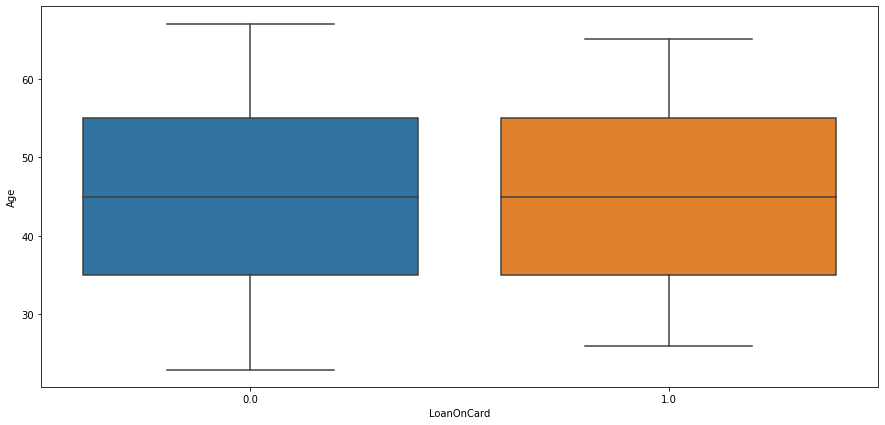

In [135]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Age', data= df)
plt.show()

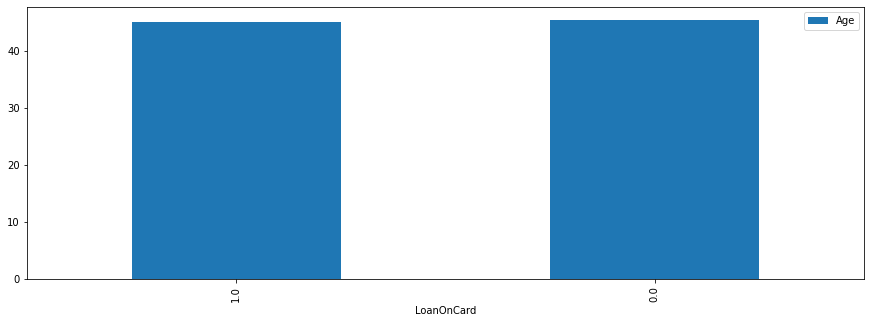

In [136]:
df.groupby(by=['LoanOnCard'])['Age'].mean().reset_index().sort_values(['Age']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Age',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

Distribution of Age is equal.It won't affect in taking loans

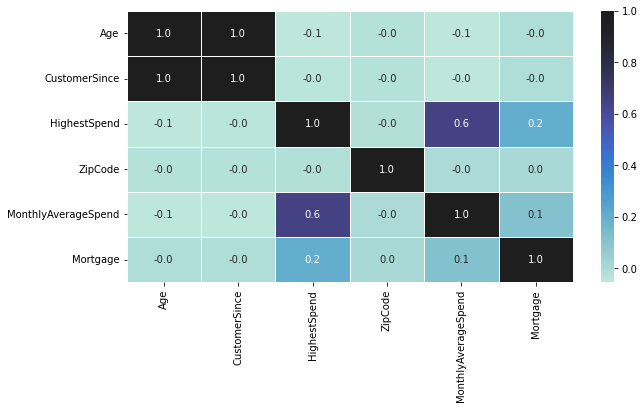

In [137]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

Age and customer since has correlation as 1. Any one can be used for the model.

Highest spend has large correlation with monthly average spend

Mortage and highest spend has little correlation

Rest of the variables does not have any relation

### Hypothesis Testing

We can statistically check whether all the independent variables has significant effect on target variables

In [138]:
class_summary=df.groupby('LoanOnCard') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
0,0.0,45.383111,20.146889,66.290444,93152.337111,1.729849,51.869111
1,1.0,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


Highest Spend mean values differ huge for loan and non-loan customer

Age mean is equal for each class

Statistical Testing of continuous feature with target variable

In [139]:
col=list(df.select_dtypes(include=['int64','float64']).columns)

Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable

H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable

In [140]:
for i in col:
    x = np.array(df[df.LoanOnCard == 0][i]) 
    y = np.array(df[df.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.5694160158774422
 Fail to Reject Null Hypothesis.Age of Loan holders and non-Loan holders are  same


 P_Value:0.5855242526574542
 Fail to Reject Null Hypothesis.CustomerSince of Loan holders and non-Loan holders are  same


 P_Value:1.527529731162187e-227
 Rejecting Null Hypothesis.HighestSpend of Loan holders and non-Loan holders are not same


 P_Value:0.9920253364424511
 Fail to Reject Null Hypothesis.ZipCode of Loan holders and non-Loan holders are  same


 P_Value:2.414409993123105e-77
 Rejecting Null Hypothesis.MonthlyAverageSpend of Loan holders and non-Loan holders are not same


 P_Value:1.3389598194359617e-10
 Rejecting Null Hypothesis.Mortgage of Loan holders and non-Loan holders are not same




We can see Age,Customer since and zip code does not have effect on target variable. So dropping this column before building model

In [141]:
df.drop(['Age','CustomerSince','ZipCode'],axis=1,inplace=True)

Statistical Testing of categorical features with target variable

Ho: There is no significant difference in hidden score for different category of target variable(Loan on card)

H1: There is significant difference in hidden score for different category of target variable(Loan on card)

In [142]:
crosstab=pd.crosstab(df['LoanOnCard'],df['HiddenScore'])
print(crosstab)

HiddenScore     1     2    3     4
LoanOnCard                        
0.0          1359  1187  873  1081
1.0           107   106  133   134


In [143]:
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)
if p_value < 0.05:  # Setting our significance level at 5%
    print('{} Rejecting Null Hypothesis. \n There is significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))
else:
    print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))

P_Value: 1.5107064617649127e-06
 Rejecting Null Hypothesis. 
 There is significant difference in hidden score for different category of target variable(Loan on card)


In [144]:
cat_col=list(df.select_dtypes(include=['category']).columns)

In [145]:
cat_col.remove('HiddenScore')
cat_col.remove('LoanOnCard')
for i in cat_col:
    crosstab=pd.crosstab(df['LoanOnCard'],df[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in FixedDepositAccount Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in InternetBanking Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)




We can see credit card,internet banking and security does not have significant difference in target variable.So dropping this column before building mode

In [146]:
df.drop(['CreditCard','InternetBanking','Security'],axis=1,inplace=True)

## Outlier Analysis

In [147]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [148]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




We have imputed all outliers with mean value

## Predictors And targets

In [149]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='LoanOnCard')
y=df['LoanOnCard'] #target

## building model without sampling:

In [150]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Logistic Regression

In [151]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9493975903614458
Accuracy on Test data: 0.9421686746987952


94% accuracy on training set and 94% accuracy on test set. Existing good accuracy

Here training set accuracy and testing accuracy are balanced when model is built without sampling 

## Confusion matrix

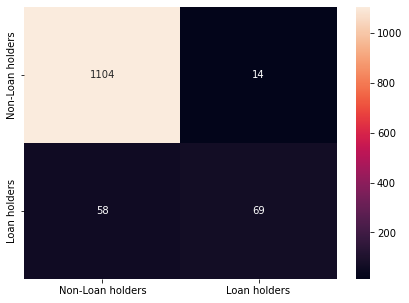

In [152]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

we are getting very less error

In [153]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.83      0.54      0.66       127

    accuracy                           0.94      1245
   macro avg       0.89      0.77      0.81      1245
weighted avg       0.94      0.94      0.94      1245



Here you can see model is poor in predicting class 1 compared to class 0

Accuracy is good (94%) but in this case we need to look on recall value

We will do the sampling and check how recall values improves in this case.

## SMOTE
Here we are doing smote for all data

In [163]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

In [164]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [165]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64


Target is balanced after sampling

In [166]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=10)

In [167]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8755555555555555
Accuracy on Test data: 0.8844444444444445


both accuracy is reduced after sampling

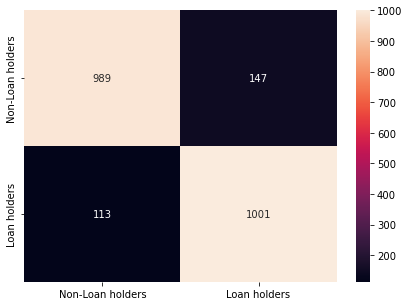

In [168]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [169]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1136
         1.0       0.87      0.90      0.89      1114

    accuracy                           0.88      2250
   macro avg       0.88      0.88      0.88      2250
weighted avg       0.88      0.88      0.88      2250



we can see recall value is improved after sampling.

So whenever we have imbalance target we will use sampling method to balance the data.

If we do smote on entire data it may leak information to validation data as well. So we will do sampling only on training data.

### we are doing smote only for training data

In [170]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [171]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)
logit = LogisticRegression()
logit.fit(x_train_res, y_train_res)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8720214190093708
Accuracy on Test data: 0.8626506024096385


here is decrease in test accuracy.

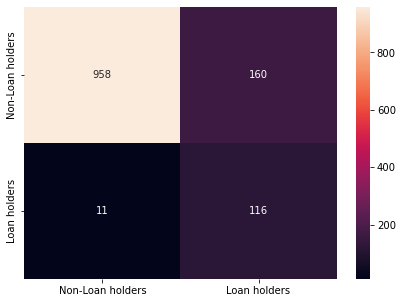

In [172]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [173]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1118
         1.0       0.42      0.91      0.58       127

    accuracy                           0.86      1245
   macro avg       0.70      0.89      0.75      1245
weighted avg       0.93      0.86      0.88      1245



C:\Users\udhay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\udhay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.946988 (0.007082)
KNN: 0.925100 (0.006901)
SV: 0.952811 (0.009599)


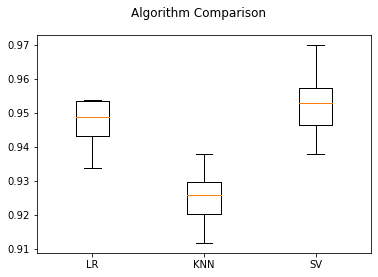

In [174]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
SVM_model = SVC(gamma=0.025, C=3) 
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SV', SVM_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Without doing any sampling using k-fold we are getting good accuracy score in SVM model.

KNN performance is less compared to SVM & LR.

As we are having imbalanced data we will use stratified k-fold to check the performance.

## Conclusion and improvisation.

We are selecting final model as logistic regression as it performs well in training and testing test.

Logistic Regression is not affected by overfitting and it is also has good recall value.

Logistic regression performed well in k-fold cross validation as well.

Deviation also less in logistic regression.

Sampling improved to predict minority classes as well

Suggesting to collect data equally for both the classes.

Few customers does't have credit card but those customer having loan on card. This data error can be avoided